# Experiment 1: Test
The point of this experiment is to test my pipeline and its integration with slurm. Maybe some useful results will comeout?

## Imports

In [1]:
import json
import os

## File and JSON generation

In [1]:
job_folder = "../../results/experiment_1"

In [3]:
task_id = 0

for alpha in [0.1, 1.0,]:
    for grok in range(5):
        for corrupt in range(5):
            task_folder = os.path.join(job_folder, f"task_{task_id}")

            os.makedirs(task_folder, exist_ok=True)
            
            params = {
                'seed': task_id,
                'alpha': alpha,
                'grok': grok,
                'corrupt': corrupt,
            }
            
            json_path = os.path.join(task_folder, "params.json")
            
            with open(json_path, 'w') as f:
                json.dump(params, f)

            task_id += 1

In [4]:
print(task_id)

50


## Grok vs. Corrupt heatmaps

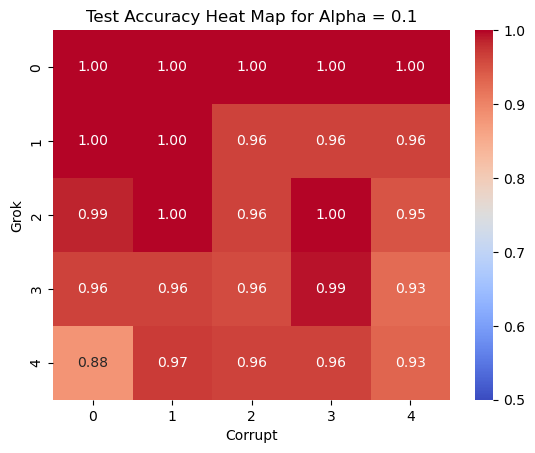

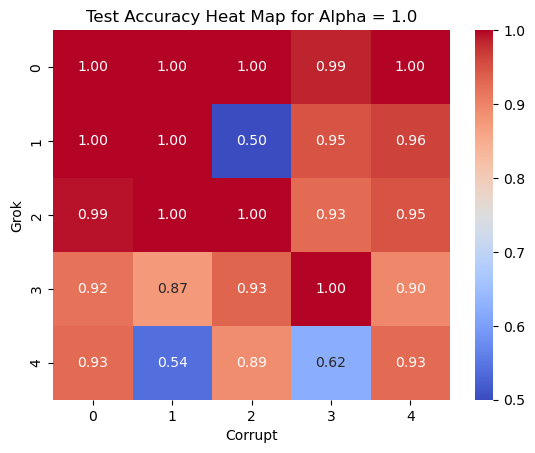

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize empty dictionaries to hold data for each alpha condition
heat_maps = {
    0.1: pd.DataFrame(index=range(5), columns=range(5)),
    1.0: pd.DataFrame(index=range(5), columns=range(5))
}

task_id = 0
for alpha in [0.1, 1.0]:
    for grok in range(5):
        for corrupt in range(5):
            task_folder = os.path.join(job_folder, f"task_{task_id}")
            csv_path = os.path.join(task_folder, "metrics_history.csv")
            
            # Load the CSV into a Pandas DataFrame
            df = pd.read_csv(csv_path)
            
            # Get the last 'test_accuracy' value
            last_test_accuracy = df['test_accuracy'].iloc[-1]
            
            # Populate the 2D array for this alpha
            heat_maps[alpha].loc[grok, corrupt] = last_test_accuracy
            
            task_id += 1

# Plot the heat maps
for alpha, data in heat_maps.items():
    data = data.astype(float)
    
    plt.figure()
    sns.heatmap(data, annot=True, fmt=".2f", cmap="coolwarm", vmin=0.5, vmax=1.0)  # Set vmin and vmax here
    plt.title(f"Test Accuracy Heat Map for Alpha = {alpha}")
    plt.xlabel("Corrupt")
    plt.ylabel("Grok")
    plt.show()